In [12]:
%load_ext autoreload
%autoreload 2

import gpjax as gpx
import pickle
import jax
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt
from gpjax.kernels import RBF, Linear, Periodic, PoweredExponential

from kernels import OrnsteinUhlenbeck
from kernelsearch import KernelSearch, describe_kernel
from util import calculate_example_lightcurve

rng_key = jax.random.PRNGKey(42)

plt.style.use(
    "https://raw.githubusercontent.com/JaxGaussianProcesses/GPJax/main/docs/examples/gpjax.mplstyle"
)
cols = mpl.rcParams["axes.prop_cycle"].by_key()["color"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# CREATE ARTIFICAL DATA

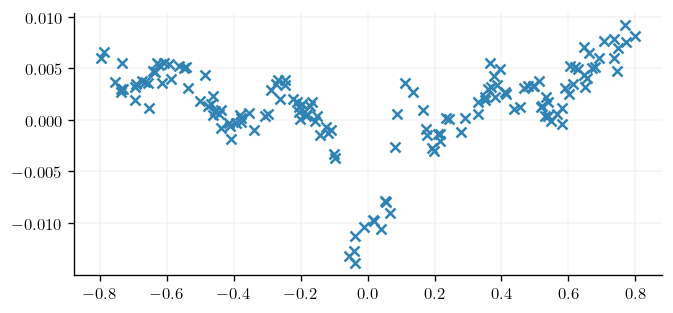

In [13]:
noise_std = 0.001
(
    t_train,
    lc_train,
    train_mask,
    t,
    lightcurve,
    systematics,
    noise,
    mask,
) = calculate_example_lightcurve(noise_std=0.001)
plt.scatter(t_train, lc_train)

## PERFORM KERNEL SEARCH

In [14]:
kernel_library = [
    Linear(),
    RBF(),
    OrnsteinUhlenbeck(),
    Periodic(),
    PoweredExponential(power=jnp.array(0.8)),
]  # default powered exponential has infinite parameter for some reason

In [15]:
tree = KernelSearch(
    kernel_library,
    X=jnp.array(t_train[train_mask]),
    y=jnp.array(lc_train[train_mask]),
    obs_stddev=noise_std,
    verbosity=1,
)

model = tree.search(
    depth=7,
    n_leafs=4,
    patience=1,
)

assert isinstance(model, gpx.gps.AbstractPosterior)
gpx.base.save_tree("/home/chris/Documents/Desktop Stuff/gaussian process", model)

Fitting Layer 1: 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]


Layer 1 || Current AICs: [-1394.95945798723, -1386.6622842026613, -1384.662284181719, -1306.2319749198916, -717.0410238244532]


Fitting Layer 2: 100%|██████████| 40/40 [01:13<00:00,  1.84s/it]


Layer 2 || Current AICs: [-1405.256392397795, -1398.4281892951633, -1398.4281892951626, -1393.1879449876258, -1392.9594579402983, -1392.9594478320084, -1392.9593512567387, -1392.106571269022, -1391.003327719544, -1390.9594570248294, -1390.5403912702227, -1390.1065711619729, -1388.5403912533347, -1388.4288940968706, -1385.666271021608, -1384.662284202662, -1384.6622842001443, -1384.654009022014, -1384.6540090219862, -1383.0642440024596, -1383.0642439275748, -1382.8614165524168, -1382.6622841894978, -1382.662284186947, -1382.6622837663317, -1382.6540090027206, -1382.6540086699374, -1381.0642434790548, -1381.0642359509734, -1381.0642297034267, -1380.861416536838, -1380.6622841337191, -1379.064243517424, -1374.4624277273626, -1372.4624277019902, -1315.0443118118346, -1304.2319749199035, -1304.2319719085021, -1302.3551487975747, inf]


Fitting Layer 3: 100%|██████████| 55/55 [04:20<00:00,  4.74s/it]


Layer 3 || Current AICs: [-1410.9831059099176, -1410.9831058261907, -1404.3335346059011, -1404.3335346059005, -1404.1834007179184, -1403.2563923968441, -1403.2563923755233, -1403.2563922315233, -1402.1834007179973, -1402.1834003769482, -1401.2563923977943, -1401.256392397787, -1401.2563923970179, -1401.2563923932055, -1400.4254253624333, -1399.2563923962716, -1396.4281892951626, -1396.4281892951524, -1396.4281892951503, -1396.4281892951433, -1396.4281892951244, -1396.4281892951026, -1396.4281892950996, -1396.4281892950771, -1396.428189295077, -1396.4281892950544, -1394.4281892992126, -1394.4281892992124, -1394.4281892951624, -1394.4281892951624, -1394.4281892951524, -1394.4281892951522, -1394.42818929515, -1394.4281892951474, -1394.4281892951158, -1394.4281892950921, -1394.412490210757, -1393.5083913530739, -1392.8105122130107, -1392.8105122130107, -1391.1879449876258, -1391.187944987621, -1391.187944983783, -1389.8533936761755, -1389.1879449835549, -1388.6488202877815, -1388.648820287

Fitting Layer 4: 100%|██████████| 60/60 [04:06<00:00,  4.10s/it]


Layer 4 || Current AICs: [-1419.785369614969, -1419.7853696144941, -1412.433808909385, -1412.4338089093837, -1408.9831059949763, -1408.98310598102, -1408.9831059099151, -1408.9831059098767, -1408.983105909431, -1408.9831059081318, -1408.9831058264433, -1408.983105826434, -1408.983105825488, -1408.983105822739, -1406.9831059099583, -1406.9831059099515, -1406.9831059099438, -1406.9831059099386, -1406.9831059096575, -1406.9831059068702, -1406.983105826468, -1406.9831058264535, -1406.983105826437, -1406.98310582635, -1406.9831058256361, -1406.983105820044, -1404.9831059099215, -1404.9831059098772, -1404.9831058264574, -1404.9831058264517, -1402.3335346058996, -1402.3335346058996, -1402.3335346058404, -1402.333534605818, -1402.333534594057, -1402.3335345931982, -1402.3335345931976, -1402.3335345902442, -1402.3335345393493, -1402.3335335288084, -1400.333534605901, -1400.3335346059005, -1400.3335346058661, -1400.3335346058295, -1400.333534605813, -1400.3335346058082, -1400.3335346058043, -140

Fitting Layer 5: 100%|██████████| 60/60 [05:30<00:00,  5.50s/it]


Layer 5 || Current AICs: [-1417.7853696149245, -1417.7853696148838, -1417.7853696148513, -1417.7853696148397, -1417.7853696147058, -1417.785369614642, -1417.78536961448, -1417.7853696143682, -1417.7853696143654, -1417.7853696143015, -1415.7853696149684, -1415.7853696149455, -1415.785369614945, -1415.7853696149014, -1415.7853696147436, -1415.7853696146642, -1415.7853696144934, -1415.7853696144932, -1415.7853696144869, -1415.7853696143204, -1415.785369614152, -1415.785369614049, -1413.7853696148638, -1413.7853696148636, -1413.785369614491, -1413.785369614464, -1410.4338148658867, -1410.4338148658867, -1410.433808909362, -1410.4338089093499, -1410.433808909348, -1410.4338089093458, -1410.4338089093442, -1410.4338089093424, -1410.43380890933, -1410.433808909125, -1408.433808909384, -1408.433808909379, -1408.4338089093785, -1408.433808909376, -1408.433808909376, -1408.433808909352, -1408.4338089093478, -1408.4338089093426, -1408.4338089093353, -1408.4338089093274, -1408.4338085403797, -1408

Fitting Layer 6: 100%|██████████| 60/60 [05:40<00:00,  5.67s/it]

Layer 6 || Current AICs: [-1417.7853696149652, -1415.785369614908, -1415.7853696148823, -1415.7853696148732, -1415.785369614862, -1415.7853696148268, -1415.7853696148102, -1415.7853696147833, -1415.785369614771, -1415.7853696147683, -1415.785369614768, -1415.7853696147652, -1415.7853696147527, -1415.78536961474, -1415.7853696146888, -1415.7853696146879, -1415.785369614679, -1415.7853696146717, -1415.7853696146587, -1415.785369614594, -1415.7853696145826, -1413.7853696149339, -1413.7853696149289, -1413.7853696149218, -1413.7853696148784, -1413.785369614875, -1413.7853696148745, -1413.7853696148672, -1413.7853696148507, -1413.7853696148404, -1413.785369614827, -1413.7853696148193, -1413.785369614798, -1413.7853696147947, -1413.785369614794, -1413.785369614789, -1413.7853696147804, -1413.7853696147718, -1413.7853696147536, -1413.7853696147286, -1413.7853696147251, -1413.7853696146926, -1413.7853696146049, -1413.7853696145655, -1413.7853696140808, -1411.7853696149007, -1411.7853696148647, 

In [32]:
assert isinstance(model, gpx.gps.AbstractPosterior)

with open("gpmodel", "wb") as file:
    pickle.dump(model, file)
describe_kernel(model)

'(Periodic * Linear * Linear) + Periodic'

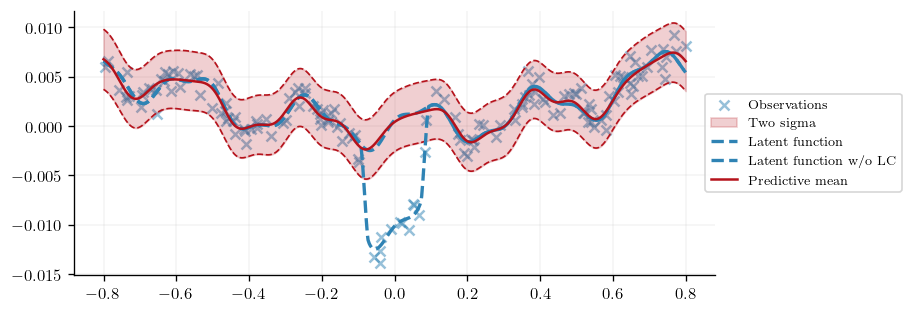

In [29]:
assert isinstance(model, gpx.gps.AbstractPosterior)

latent_dist = model(t.reshape(-1, 1), train_data=tree.data)
predictive_dist = model.likelihood(latent_dist)

predictive_mean = predictive_dist.mean()
predictive_std = predictive_dist.stddev()

fig, ax = plt.subplots(figsize=(7.5, 2.5))
ax.scatter(t_train, lc_train, label="Observations", color=cols[0], alpha=0.5)
ax.fill_between(
    t,
    predictive_mean - 2 * predictive_std,
    predictive_mean + 2 * predictive_std,
    alpha=0.2,
    label="Two sigma",
    color=cols[1],
)
ax.plot(
    t,
    predictive_mean - 2 * predictive_std,
    linestyle="--",
    linewidth=1,
    color=cols[1],
)
ax.plot(
    t,
    predictive_mean + 2 * predictive_std,
    linestyle="--",
    linewidth=1,
    color=cols[1],
)
ax.plot(
    t,
    lightcurve + systematics,
    label="Latent function",
    color=cols[0],
    linestyle="--",
    linewidth=2,
)
ax.plot(
    t,
    systematics,
    label="Latent function w/o LC",
    color=cols[0],
    linestyle="--",
    linewidth=2,
)
ax.plot(t, predictive_mean, label="Predictive mean", color=cols[1])
ax.legend(loc="center left", bbox_to_anchor=(0.975, 0.5))